# **Preparando a base de dados**

In [203]:
# importando bibliotecas usadas na análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
with open(r"C:\Users\PP\OneDrive - Fundação São Paulo\PUC-SP\2 Semestre\Estatística laboratório\Aula 2\colunas", "r") as columns: # Lendo o arquivo e salvando em columns
    
    ''' Lendo o arquivo e usando o comando splitlines que separa o texto em linhas,
    consequentemente retornando uma lista com os nomes das colunas'''
    columns = columns.read().splitlines() 
columns

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [205]:
# Lendo a base de dados e colocando as colunas como números
automobiles = pd.read_csv(r"C:\Users\PP\OneDrive - Fundação São Paulo\PUC-SP\2 Semestre\Estatística laboratório\Aula 2\automobile\automobiles.csv", header = None)
automobiles.columns = columns # Reescrevendo os nomes das colunas
automobiles

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [206]:
'''No arquivo da base de dados Automobile, há uma descrição detalhada das informações contidas. 
Nesse arquivo, podemos identificar as colunas que apresentam valores faltantes. 
Com base nessas colunas, realizaremos o procedimento de substituição dos valores ausentes representados por "?" para "NaN".'''

columns_with_NaN = [columns[x] for x in range(len(columns)) if x in [1, 18, 19, 21, 22, 25]] # Separando em uma lista o nome das colunas com valores faltantes

automobiles[columns[5]] = automobiles[columns[5]].replace("?", np.nan) # Substituindo na coluna categórica os símbolos "?" para "NaN" 

'''Substituindo nas colunas numéricas os símbolos "?" para "NaN". E colocando o tipo de dado como float'''
for x in columns_with_NaN: automobiles[x] = automobiles[x].replace("?", np.nan).astype(float) 

r'''Observação: O código "automobiles[x] = automobiles[x].replace("?", np.nan)" poderia ter sido escrto da seguinte forma: automobiles[x].replace("?", np.nan, inplace = True)
Entretanto ao realizar esse método houve um Warning, sujerindo que realizassemos o código da forma em que foi usada.

Warning gerado:
        C:\Users\PP\AppData\Local\Temp\ipykernel_17436\1904273697.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
        The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

        For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


        for x in columns_with_NaN: automobiles[x].replace("?", np.nan, inplace = True)'''


automobiles

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# **Limpando os valores faltantes da base de dados**

In [207]:
automobiles.info() # Código para verificar o tipo das colunas   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [208]:
automobiles["num-of-doors"].value_counts() # Verificando quantas vezes aparece four e two.

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [209]:
# Substituindo os valores de NaN por four, o valor que mais aparece nessa coluna
automobiles["num-of-doors"] = automobiles["num-of-doors"].replace(np.nan, "four")

In [210]:
describe = automobiles.describe() # Usando o describe para poder substituir os valores faltantes na base de dados
describe

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [211]:
# Substituindo os valores faltantes das colunas pela média de cada coluna
automobiles["normalized-losses"] = automobiles["normalized-losses"].replace(np.nan, round(describe.loc["mean", "normalized-losses"])).astype(int)
automobiles["bore"] = automobiles["bore"].replace(np.nan, round(describe.loc["mean", "bore"], 2))
automobiles["stroke"] = automobiles["stroke"].replace(np.nan, round(describe.loc["mean", "stroke"], 2))
automobiles["horsepower"] = automobiles["horsepower"].replace(np.nan, round(describe.loc["mean", "horsepower"])).astype(int)
automobiles["peak-rpm"] = automobiles["peak-rpm"].replace(np.nan, round(describe.loc["mean", "peak-rpm"]))
automobiles["price"] = automobiles["price"].replace(np.nan, round(describe.loc["mean", "price"]))

In [212]:
automobiles

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0


# **Gráficos**

In [213]:
automobiles.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255512,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313598,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


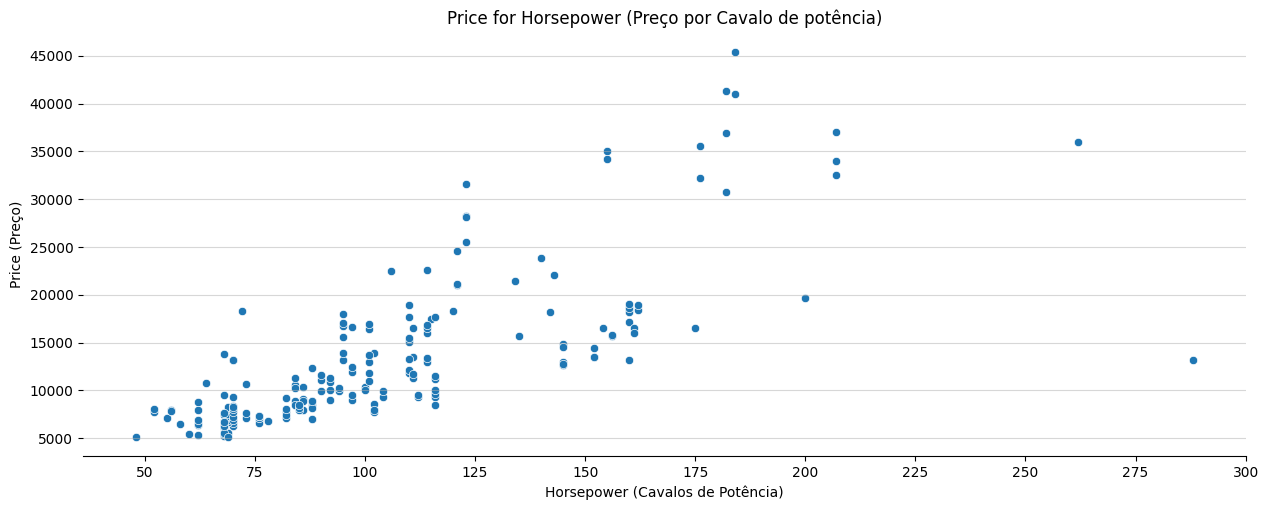

In [214]:
plt.figure(figsize = (15, 5.5)) # Mudar o tamanho do gráfico
sns.scatterplot(data = automobiles, x = "horsepower", y = "price") # Criar o scatterplot (Gráfico de dispersão)

plt.gca().spines["top"].set_visible(False) # Tirar a borda de cima do gráfico
plt.gca().spines["right"].set_visible(False) # Tirar a borda à direita do gráfico
plt.gca().spines["left"].set_visible(False) # Tirar a borda à esquerda do gráfico

plt.title("Price for Horsepower (Preço por Cavalo de potência)") # Título do gráfico
plt.ylabel("Price (Preço)") # Nome do eixo y
plt.xlabel("Horsepower (Cavalos de Potência)") # Nome do eixo x

plt.xticks(range(50, 301, 25)) # Mudar o intervalo do eixo x

plt.grid(axis = "y", alpha = 0.5) # Colocar as linhas no gráfico. Alpha é para mudar a transparência das linhas no gráfico
plt.show() # Tirar o lixo do gráfico

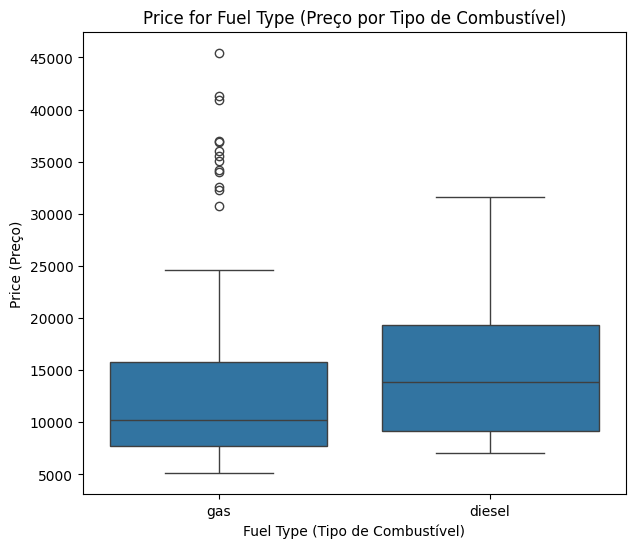

In [215]:
plt.figure(figsize = (7, 6)) # Mudar o tamanho do gráfico
sns.boxplot(data = automobiles, x = "fuel-type", y = "price") # Criar o boxplot

plt.title("Price for Fuel Type (Preço por Tipo de Combustível)") # Título do gráfico
plt.ylabel("Price (Preço)") # Nome do eixo y
plt.xlabel("Fuel Type (Tipo de Combustível)") # Nome do eixo x

plt.show() # Tirar o lixo do gráfico

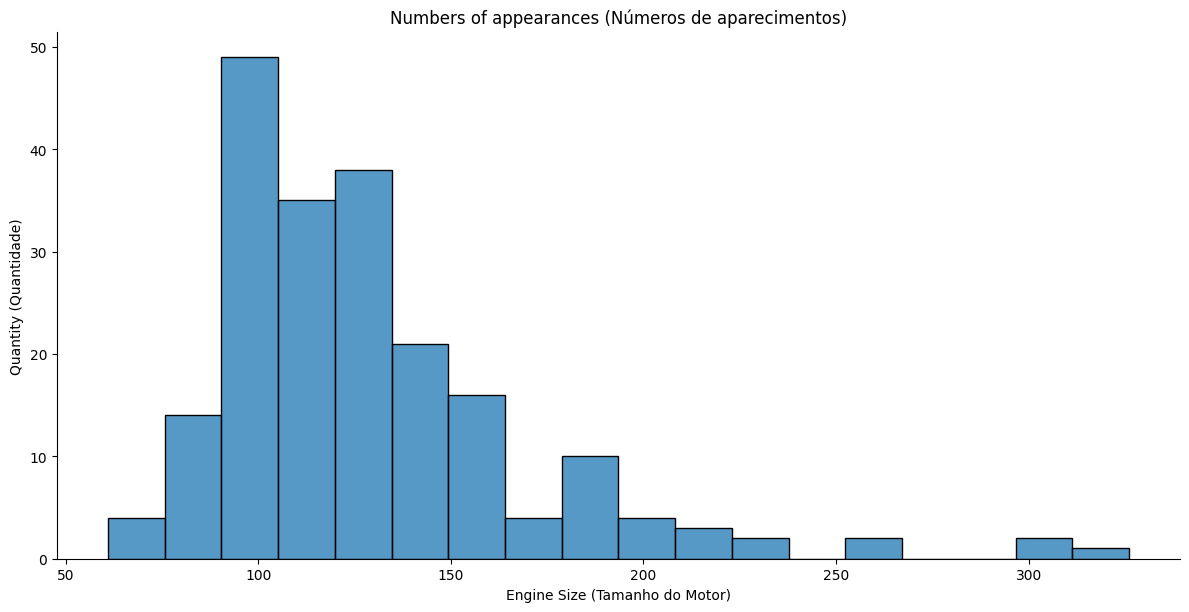

In [216]:
sns.displot(data = automobiles, x = "engine-size", height = 6, aspect = 2) # Criação do histograma 

plt.title("Numbers of appearances (Números de aparecimentos)") # Título do gráfico
plt.ylabel("Quantity (Quantidade)") # Nome do eixo y
plt.xlabel("Engine Size (Tamanho do Motor)") # Nome do eixo x

plt.show()